In [1]:
import folium
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# m1 = folium.Map(location=[35.868863,128.600299], zoom_strat=14)

# # 국채보상운동기념공원주차장
# folium.Marker([35.868863,128.600299]).add_to(m2)

# # 대구시청
# folium.Marker([35.871039,128.601444],
#                popup='<b>parking,/b').add_to(m2)

# # 서문주차빌딩
# folium.Marker([35.868986  ,128.581015 ],
#              tooltip='<i>서문주차빌딩</i>').add_to(m2)

In [3]:
import requests
from bs4 import BeautifulSoup
from collections import Counter

In [4]:
# url1 = (f'https://search.naver.com/search.naver?display=15&f=&filetype=0&page={i+2}&query=%EC%A0%84%EA%B8%B0%EC%B0%A8%20%EB%8C%80%EC%88%98%EB%B3%84%20%EC%B6%A9%EC%A0%84%EC%86%8C&research_url=&sm=tab_pge&start={i*15+1}&where=web')

In [5]:
# num = 10, 20, 30, 40, 50, 60, 70, 80

# for i in num:
#     print(i)

In [6]:
# url1 = (f'https://www.google.com/search?q=%EB%8C%80%EA%B5%AC+%EC%A0%84%EA%B8%B0%EC%B0%A8+%EC%B6%A9%EC%A0%84%EC%86%8C+%EB%B6%80%EC%A1%B1&ei=jvFVY6udOoXW-Qb2353ADA&start={i}&sa=N&ved=2ahUKEwirnI6p4vf6AhUFa94KHfZvB8g4HhDy0wN6BAgNEAs&biw=1707&bih=956&dpr=1.5')
# html1 = requests.get(url1)
# # bs = BeautifulSoup(html1.text, 'lxml')
# bs = BeautifulSoup(html1.text, 'html.parser')
# bs1_1 = bs.find_all('span', {'class':'MUxGbd wuQ4Ob WZ8Tjf'})
# bs1_1

In [7]:
# 네이버 페이지 전기차충전소 크롤링
naver1 = []
naver2 = []

num = 0, 10, 20, 30, 40, 50, 60, 70, 80, 90
for i in num:
    print(f'{i}페이지 분석중....')
    url1 = (f'https://www.google.com/search?q=%EB%8C%80%EA%B5%AC+%EC%A0%84%EA%B8%B0%EC%B0%A8+%EC%B6%A9%EC%A0%84%EC%86%8C+%EB%B6%80%EC%A1%B1&ei=jvFVY6udOoXW-Qb2353ADA&start={i+15}&sa=N&ved=2ahUKEwirnI6p4vf6AhUFa94KHfZvB8g4HhDy0wN6BAgNEAs&biw=1707&bih=956&dpr=1.5')
    html1 = requests.get(url1)
    # bs = BeautifulSoup(html1.text, 'lxml')
    bs = BeautifulSoup(html1.text, 'html.parser')
    bs1 = bs.find_all('div', {'class':'BNeawe vvjwJb AP7Wnd'})
    bs1_1 = bs.select('span')
    print(bs1_1)
    for bs2 in bs1:
        naver1.append(bs2.get_text())
#     for bs2_2 in bs1_1:
#         print(bs2_2)

0페이지 분석중....
[<span class="V6gwVd">G</span>, <span class="iWkuvd">o</span>, <span class="cDrQ7">o</span>, <span class="V6gwVd">g</span>, <span class="ntlR9">l</span>, <span class="iWkuvd tJ3Myc">e</span>, <span class="OXXup">전체</span>, <span class="OmTIzf"></span>, <span class="OmTIzf"></span>, <span class="OmTIzf"></span>, <span class="r0bn4c rQMQod">2022. 6. 4.</span>, <span class="r0bn4c rQMQod"> · </span>, <span class="r0bn4c rQMQod">2019. 12. 30.</span>, <span class="r0bn4c rQMQod"> · </span>, <span class="r0bn4c rQMQod">2021. 2. 17.</span>, <span class="r0bn4c rQMQod"> · </span>, <span class="r0bn4c rQMQod">2017. 7. 17.</span>, <span class="r0bn4c rQMQod"> · </span>, <span class="r0bn4c rQMQod">2021. 10. 21.</span>, <span class="r0bn4c rQMQod"> · </span>, <span class="BNeawe"><a href="https://www.google.com/search?biw=1707&amp;bih=956&amp;ie=UTF-8&amp;ei=5ClWY4HmMoTmkPIPwomXQA&amp;q=%EB%8C%80%EA%B5%AC+%EC%A0%84%EA%B8%B0%EC%B0%A8+%EC%B6%A9%EC%A0%84%EC%86%8C+%EB%B6%80%EC%A1%B1&amp;

[<span class="V6gwVd">G</span>, <span class="iWkuvd">o</span>, <span class="cDrQ7">o</span>, <span class="V6gwVd">g</span>, <span class="ntlR9">l</span>, <span class="iWkuvd tJ3Myc">e</span>, <span class="OXXup">전체</span>, <span class="OmTIzf"></span>, <span class="OmTIzf"></span>, <span class="OmTIzf"></span>, <span class="r0bn4c rQMQod">2017. 1. 20.</span>, <span class="r0bn4c rQMQod"> · </span>, <span class="r0bn4c rQMQod">2018. 4. 18.</span>, <span class="r0bn4c rQMQod"> · </span>, <span class="r0bn4c rQMQod">2018. 10. 24.</span>, <span class="r0bn4c rQMQod"> · </span>, <span class="r0bn4c rQMQod">2016. 3. 27.</span>, <span class="r0bn4c rQMQod"> · </span>, <span class="r0bn4c rQMQod">2022. 9. 4.</span>, <span class="r0bn4c rQMQod"> · </span>, <span class="r0bn4c rQMQod">3일 전</span>, <span class="r0bn4c rQMQod"> · </span>, <span class="r0bn4c rQMQod">2022. 6. 22.</span>, <span class="r0bn4c rQMQod"> · </span>, <span class="r0bn4c rQMQod">4일 전</span>, <span class="r0bn4c rQMQod"> · 

In [8]:
print(naver1)

['고유가로 전기차 폭증하는데 충전시설 태부족…“차 빼주세요” 자리 ...', '대구 전기차 공영충전소, 2020년부터 유료화…1㎾h당 173.8원', '[PDF] 전기차 충전요금 , 4.11일부터 유료화', '[PDF] 미래차 상용화 발목잡는 충전인프라 - 경기연구원', '대구시, 전국 최초 「전기차 충전기 관제센터」구축·개소! - 용인신문', '양금희 의원. 전기차 충전 인프라 대구 전국 15위', '고속도로 휴게소 급속 충전시설 부족 ::::: 기사 - 대구MBC', '대구시, 전국 최초′전기차 충전기 관제센터′구축‧개소! - 로컬세계', '대구환경공단 - 전기자동차 충전인프라 구축 및 관제센터 운영', '대구에 전국 최초 `전기차 충전기 관제센터` - 경북신문', '대구은행–대구시, 전기차 보급 확대 업무협약 - 세명일보', '"전기차충전소 부족? 우리업역 아냐" 도로공사 태도에 \'맹질타\' - Daum', "대구시, 전국 최초 '전기차 충전기 관제센터' 개소 - YouTube", '기획재정부 문서뷰어', '[전기차 시대, 우리 농촌은] 정부, 전기차 보급 가속화…농촌 ... - 농민신문', '수소.전기차 충전 인프라 턱없이 부족 - 에너지데일리', '"전기차충전소 부족? 우리업역 아냐" 도로공사 태도에 \'맹질타\'', '홍보센터 - 새누', '대구시, 민간 주도 전기차 충전사업 시작 위한 업무협약 체결', '대구시, 충전 인프라 태부족...“친환경차 충전 불편” < 대구 ... - 퍼블릭뉴스', '"충전할 곳이 없어요" 인천 전기차 충전기 태부족 - 일간경기', "전기차 수 '100만 시대' 근접…충전소 부족은 여전 - 경기신문", '대구환경공단, 전기차 이용자 편의시설 개선 위해 긴급충전서비스 시작', '날씨 화창하지만…나들이 대신 충전소 찾는 이들의 사연 - 매일경제', '전기차 인프라 전세계 1위라는 한국, 참혹한 실상은 이렇습니다', '대구시, 전국 최초「전기차 충전기 관제센터」구축&#8231 - 영남투데이', "대구도 전기차 화재 '비상'

In [9]:
print(naver2)

[]


In [10]:
from konlpy.tag import Okt

okt = Okt()
noun_adj_list = []
for data in naver1:
    sentences_tag = okt.pos(data)
    # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
    for word, tag in sentences_tag:
        if tag in ['Noun']:
            noun_adj_list.append(word)

In [11]:
noun_adj_list
counts = Counter(noun_adj_list)
tags = counts.most_common(35)
tags

[('전기차', 53),
 ('충전', 39),
 ('대구', 19),
 ('소', 17),
 ('충전기', 17),
 ('부족', 15),
 ('대구시', 15),
 ('뉴스', 13),
 ('전국', 12),
 ('센터', 12),
 ('관제', 11),
 ('인프라', 10),
 ('최초', 10),
 ('구축', 9),
 ('신문', 8),
 ('전기자동차', 6),
 ('보급', 6),
 ('일보', 6),
 ('시설', 5),
 ('시대', 5),
 ('태', 4),
 ('위', 4),
 ('고속도로', 4),
 ('환경', 4),
 ('공단', 4),
 ('한국', 4),
 ('전기', 4),
 ('경기', 3),
 ('연구원', 3),
 ('휴게소', 3),
 ('우리', 3),
 ('인천', 3),
 ('사회', 3),
 ('본격', 3),
 ('린다', 3)]

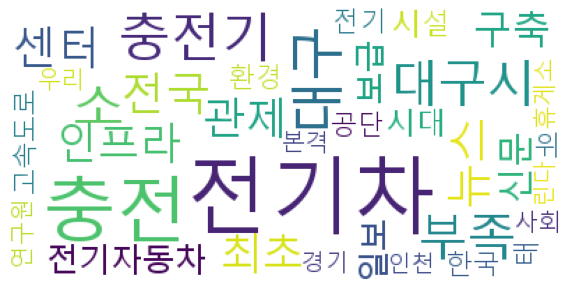

In [12]:
# WordCloud를 생성한다.
from wordcloud import WordCloud
import platform
import matplotlib.pyplot as plt

if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud1 = wc.generate_from_frequencies(dict(tags))

# 생성된 WordCloud를 test.jpg로 보낸다.
#cloud.to_file('test.jpg')

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud1)
plt.show()

In [13]:
# https://www.google.com/search?q=%EB%8C%80%EA%B5%AC+%EC%A0%84%EA%B8%B0%EC%B0%A8+%EC%B6%A9%EC%A0%84%EC%86%8C+%EB%B6%80%EC%A1%B1&ei=GvFVY8rECYT7wAOH46II&ved=0ahUKEwjKubXx4ff6AhWEPXAKHYexCAEQ4dUDCA8&uact=5&oq=%EB%8C%80%EA%B5%AC+%EC%A0%84%EA%B8%B0%EC%B0%A8+%EC%B6%A9%EC%A0%84%EC%86%8C+%EB%B6%80%EC%A1%B1&gs_lcp=Cgdnd3Mtd2l6EAMyBAgAEB4yBAgAEB4yBggAEAgQHjICCCYyAggmOgoIABBHENYEELADOgUIABCABDoLCC4QgAQQxwEQrwFKBAhBGABKBAhGGABQ5AVYyiNgliVoA3ABeAGAAdkCiAGHHpIBCDAuMy4xMC4zmAEAoAEByAEKwAEB&sclient=gws-wiz
# https://www.google.com/search?q=%EB%8C%80%EA%B5%AC+%EC%A0%84%EA%B8%B0%EC%B0%A8+%EC%B6%A9%EC%A0%84%EC%86%8C+%EB%B6%80%EC%A1%B1&ei=QfFVY6yyGZT7-QbWwY7gBg&start=10&sa=N&ved=2ahUKEwjs1pGE4vf6AhWUfd4KHdagA2wQ8tMDegQIBhAE&biw=1707&bih=956&dpr=1.5
# https://www.google.com/search?q=%EB%8C%80%EA%B5%AC+%EC%A0%84%EA%B8%B0%EC%B0%A8+%EC%B6%A9%EC%A0%84%EC%86%8C+%EB%B6%80%EC%A1%B1&ei=WfFVY4PWDM6dhwP0lr-QAw&start=20&sa=N&ved=2ahUKEwjD5r2P4vf6AhXOzmEKHXTLDzI4ChDy0wN6BAgaEAc&biw=1707&bih=956&dpr=1.5
# https://www.google.com/search?q=%EB%8C%80%EA%B5%AC+%EC%A0%84%EA%B8%B0%EC%B0%A8+%EC%B6%A9%EC%A0%84%EC%86%8C+%EB%B6%80%EC%A1%B1&ei=fvFVY7TfDZSD-QbnoK-4Cg&start=30&sa=N&ved=2ahUKEwi0lpGh4vf6AhWUQd4KHWfQC6c4FBDy0wN6BAgFEAk&biw=1707&bih=956&dpr=1.5
# https://www.google.com/search?q=%EB%8C%80%EA%B5%AC+%EC%A0%84%EA%B8%B0%EC%B0%A8+%EC%B6%A9%EC%A0%84%EC%86%8C+%EB%B6%80%EC%A1%B1&ei=jvFVY6udOoXW-Qb2353ADA&start=40&sa=N&ved=2ahUKEwirnI6p4vf6AhUFa94KHfZvB8g4HhDy0wN6BAgNEAs&biw=1707&bih=956&dpr=1.5